In [2]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [3]:
n=int(5e6)
t=np.linspace(-10,10,n)

#parameters
a = 3.25; b=-6.5
x=polyval([3.25,-6.5],t)

#add some noise
xn=x+3*randn(n)

C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\44879507.py:6: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  x=polyval([3.25,-6.5],t)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\44879507.py:9: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  xn=x+3*randn(n)


C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\559528374.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\559528374.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  yvar=polyval([a,b],xvar)+3*randn(20)


[-4.25957085 -2.16721443  1.24415025  9.57285191  8.44389569 -5.93498719
  3.61033472 -7.30817546  5.14528303  3.22461064  5.9775912   4.82657497
  2.5001025   2.12660243  3.95386679 -9.94795999  5.29264706 -1.14939423
 -4.91665498 -3.81124676] [-17.28488486  -8.52542247  -3.48334208  22.53209897  16.32482952
 -25.39968694   5.60182191 -30.89287542  15.73453123   2.37464441
  11.00531647  10.89930045   0.0832636    1.79492679  12.31397287
 -38.75027968  16.1703298  -11.5536181  -19.20217535 -20.22714824]


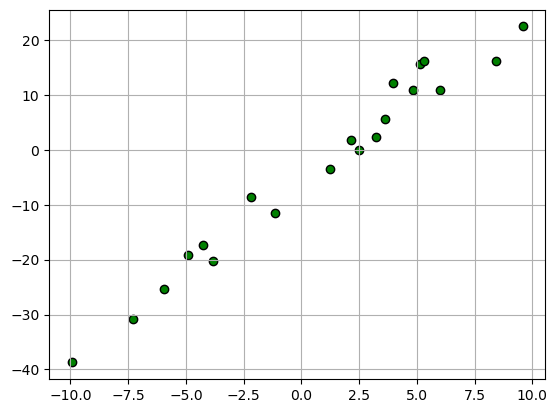

In [4]:
xvar=np.random.choice(t, size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
print(xvar, yvar)
plt.scatter(xvar, yvar, c='green', edgecolors='k')
plt.grid(True)
plt.show()

In [5]:
t1=time.time()
(ar, br)=polyfit(t,xn,1)
print(ar,br)
## xr 은 회귀식 위에 y값 찍은거
xr=polyval([ar,br],t)

# xr-xn 은 회귀식 위에 y값 xr, 원자료 y값 이므로 잔차
err = sqrt(sum((xr-xn)**2)/n)

t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters : a=%.2f b=%.2f, mse=%.3f' % (ar,br,err))

C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\3748505715.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  (ar, br)=polyfit(t,xn,1)


3.249943921599687 -6.5006984623510125


C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\3748505715.py:5: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  xr=polyval([ar,br],t)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\3748505715.py:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  err = sqrt(sum((xr-xn)**2)/n)


Linear regression using polyfit
parameters : a=3.25 b=-6.50, mse=3.001


[-9.89609598  9.70157994]


C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\680828245.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\680828245.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\680828245.py:4: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit_line = polyfit(xvar, yvar, 1)


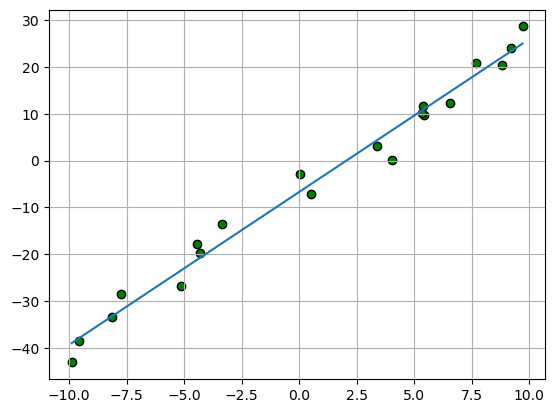

In [6]:
xvar=np.random.choice(t, size=20)
yvar=polyval([a,b],xvar)+3*randn(20)

fit_line = polyfit(xvar, yvar, 1)

x_minmax = np.array([min(xvar), max(xvar)])
fit_y = x_minmax * fit_line[0] + fit_line[1]
print(x_minmax)

plt.scatter(xvar, yvar, c='green', edgecolors='k')
plt.grid(True)
plt.plot(x_minmax, fit_y)
plt.show()

 
3.333 x - 6.768


C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\2579205225.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\2579205225.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12408\2579205225.py:4: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit_line = polyfit(xvar, yvar, 1)


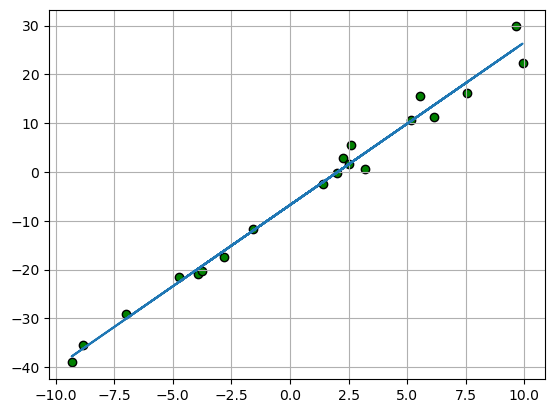

In [7]:
xvar=np.random.choice(t, size=20)
yvar=polyval([a,b],xvar)+3*randn(20)

fit_line = polyfit(xvar, yvar, 1)

p = np.poly1d(fit_line)
print(p)


plt.scatter(xvar, yvar, c='green', edgecolors='k')
plt.grid(True)
plt.plot(xvar, p(xvar))
plt.show()

In [10]:
(a_s, b_s, r, tt, stderr)=stats.linregress(t,xn)

print('a=%.2f b=%.2f std error=%.3f, r^2 coefficient=%.3f' % (a_s,b_s,stderr,r))

a=3.25 b=-6.50 std error=0.000, r^2 coefficient=0.987


* int(5e6) = 5 * 10^6 = 500000
* int(1e3) = 1 * 10^3 = 1000
---------------
* np.linspace(start, stop, num) : start부터 stop까지 num개 1차원 배열 생성
---------------
* p = [p2, p1, p0]
* polyval(p, 2) : p2 * x^2 + p1 * x^1 + p0  - x=2일때 다항식 표현
> - ex) p = [3, -2, 5, 0, 1], x = np.linspace(-10,10,2)
> - x = array([-10, 10])
> - polyval(p,x)
$$3X^4 - 2X^3 + 5X^2 + 1$$ X 값 -10, 10 대입
> - array([32501, 28501])
---------------
* randn(n) : 정규분포된 난수로 구성된 n x n 행렬
---------------
* np.random.choice(t, size=20) : t 안에 20개 랜덤추출
---------------
* python 컬러 : c ( Cyan ), k ( Black ), y ( Yellow )
---------------
* plt.grid(True) : 격자 그림 O
---------------
* polyfit(a,b,1) : 회귀식 b0, b1 값 나옴
* output - (3.5, -15) : 회귀식 $$3.5 x - 15$$
---------------
* 산점도 위에 추세선 그리기 1번
> - xvar : x값 500000개 중에 20개 랜덤추출
> - yvar : y값 a~b 범위 안에 다항식 y값 20개 랜덤추출
> - fit_line(추세선) : x값의 최대 최소 구해서 array형식으로 변환
> - x_minmax = np.array([min(xvar), max(xvar)]) :
> - fit_y = x_minmax * fit_line[0] + fit_line[1]
> - fit_line[0] : b1, fit_line[1] : b0
> - fit_ y는 [(x의 최솟값 * b1 + b0 , x의 최댓값 * b1 + b0)]
* 산점도 위에 추세선 그리기 2번
> - fit_line = polyfit(xvar, yvar, 1)
> - b1, b0 구하기
> - p = np.poly1d(fit_line) : 추세선 1차원 캡슐화 (output = 3.269 x - 6.334)
> - plt.plot(xvar, p(xvar))
* stats.linregress(t,xn) : 파라미터, 표준오차, 결정계수 값
----------------